# K means clustering

Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

Not for distribution.

In [1]:
#Import the file into jupyter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

Givendataset = pd.read_csv("Iris.csv")
Givendataset.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


How do you find the optimum number of clusters for K Means? How does one determine the value of K?

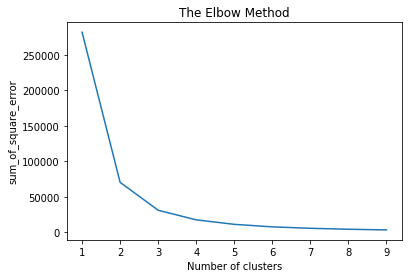

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = Givendataset.iloc[:, [0, 1, 2, 3]].values

k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
sse
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("sum_of_square_error")
plt.plot(k_rng,sse)

#This shows that elbow plot is having curve at point 3 clusters so number of clusters=3

In [7]:
# Applying kmeans to the dataset 
kmeansnew = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeansnew.fit_predict(x)

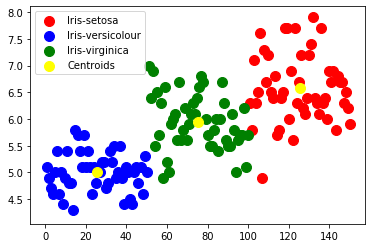

In [11]:
#Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeansnew.cluster_centers_[:, 0], kmeansnew.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()